In [ ]:
%matplotlib inline
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [ ]:
print(mnist.data.shape)

(70000, 784)


In [ ]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl =train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0
)

In [ ]:
print(train_img.shape)

(60000, 784)


In [ ]:
print(train_lbl.shape)

(60000,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

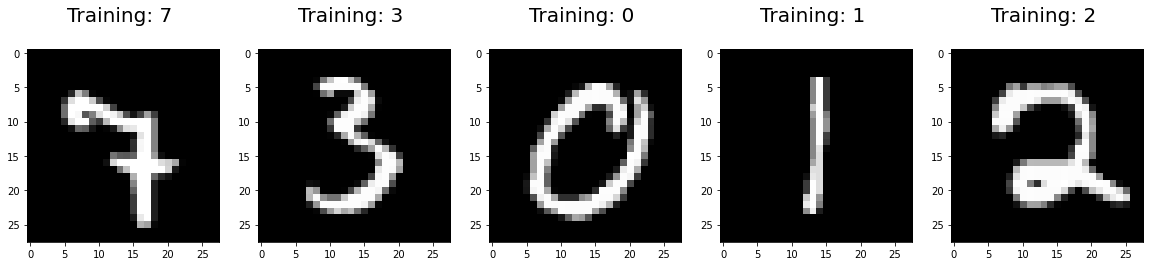

In [ ]:
plt.figure(figsize =(20,4))
for index, (images, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
  plt.subplot(1,5, index + 1)
  plt.imshow(np.reshape(images, (28,28)), cmap =plt.cm.gray)
  plt.title('Training: %s \n' %label,fontsize =20)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression(solver ='lbfgs')

In [ ]:
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logisticRegr.predict(test_img[0].reshape(1, -1))

array(['0'], dtype=object)

In [ ]:
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [ ]:
predictions = logisticRegr.predict(test_img)

In [ ]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9184


In [ ]:
index = 0
misclassifiedIndexes =[]
for label, predict in zip(test_lbl, predictions):
  if label != predict:
    misclassifiedIndexes.append(index)
  index += 1

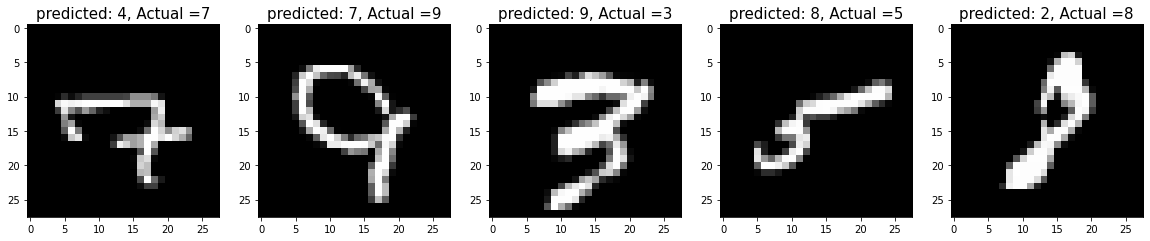

In [ ]:
plt.figure(figsize =(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
  plt.subplot(1, 5, plotIndex + 1)
  plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap =plt.cm.gray)
  plt.title('predicted: {}, Actual ={}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize =15)


In [ ]:
index2 = 0
correctclassifiedIndexes =[]
for label, predict in zip(test_lbl, predictions):
  if label == predict:
    correctclassifiedIndexes.append(index2)
  index2 += 1

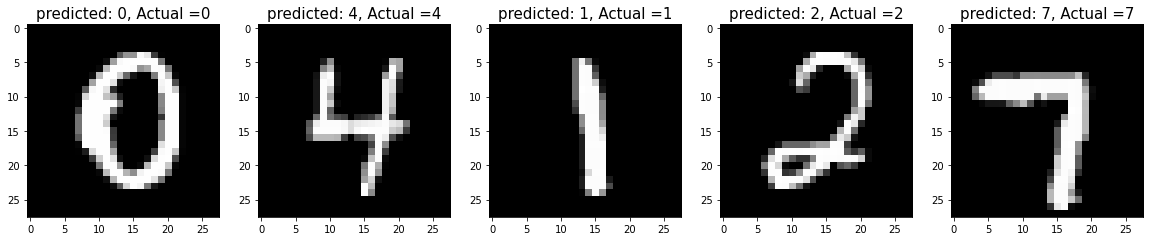

In [ ]:
plt.figure(figsize =(20,4))
for plotIndex, badIndex in enumerate(correctclassifiedIndexes[0:5]):
  plt.subplot(1, 5, plotIndex + 1)
  plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap =plt.cm.gray)
  plt.title('predicted: {}, Actual ={}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize =15)

In [ ]:
import seaborn as sns
from sklearn import metrics

In [ ]:
#confusion map
confm = metrics.confusion_matrix(test_lbl, predictions)
print(confm)

[[ 968    0    1    1    2   10    8    2    4    0]
 [   0 1115    6    2    1    4    0    4    7    2]
 [   4   12  933   15   12    1   15    9   35    4]
 [   1    5   35  892    0   25    3   12   27   13]
 [   1    2    5    0  898    1   11   10    6   28]
 [   8    2    8   31    9  746   13    5   33    8]
 [   8    3    8    0   11   17  936    2    4    0]
 [   2    5   15    4   11    2    1  980    4   40]
 [   4   20   11   18    7   28    9    2  854   10]
 [   4    4    5   10   34    8    2   32    8  862]]


Text(0.5, 1.0, 'Accuracy Score: 0.9184')

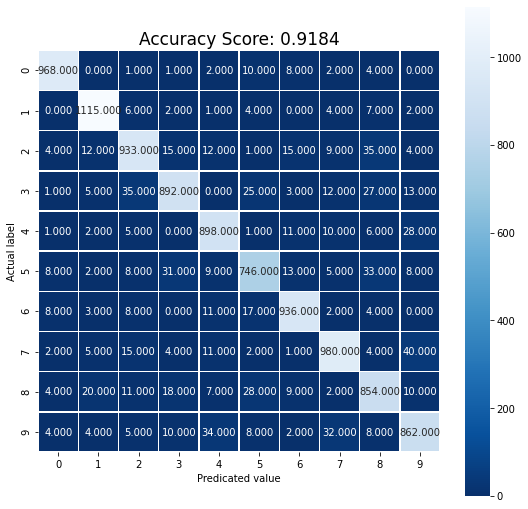

In [ ]:
plt.figure(figsize =(9,9))
sns.heatmap(confm, annot=True, fmt= ".3f", linewidths =.5, square =True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicated value');
all_sample_title ='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size =17)